# Exploration der Word2vec Embeddings 1

- ohne Bigramme
- vector_size: 300
- window: 3
- min_count: 2
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [2]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('trained_models/Word2Vec1', '1w2v11.model'))

In [3]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1985', '1986-2000', '2001-2021']

In [4]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11] 

In [5]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [6]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [7]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')
essere0 = compare_cos(periods, models, 'essere', 'molto')
avere0 = compare_cos(periods, models, 'avere', 'molto')

In [8]:
spesso0

{'1700-1750': 0.31230390071868896,
 '1751-1800': 0.41333192586898804,
 '1801-1825': 0.5113088488578796,
 '1826-1850': 0.5327090620994568,
 '1851-1875': 0.4086698591709137,
 '1876-1900': 0.4420602321624756,
 '1901-1925': 0.44673141837120056,
 '1926-1950': 0.4080256223678589,
 '1951-1985': 0.3054053485393524,
 '1986-2000': 0.42963042855262756,
 '2001-2021': 0.49224165081977844}

In [9]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0, essere0, avere0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

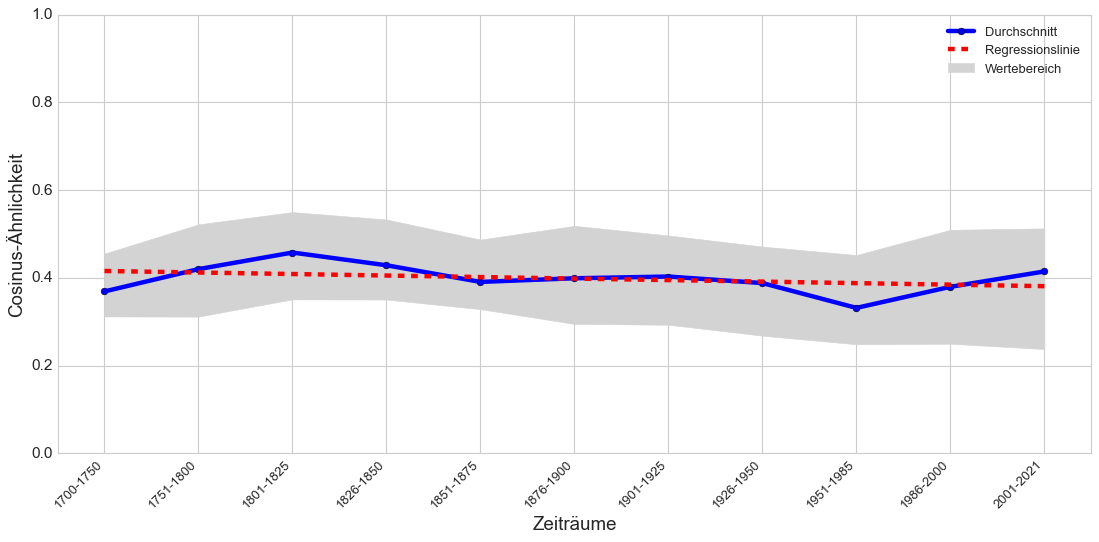

In [14]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [15]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

#domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])
domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [16]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [17]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [18]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [19]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [20]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [21]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

In [22]:
# essere 

essere1 = compare_cos(periods, models, 'essere', 'angoscia')
essere2 = compare_cos(periods, models, 'essere', 'atterrire')
essere3 = compare_cos(periods, models, 'essere', 'panico')
essere4 = compare_cos(periods, models, 'essere', 'paura')
essere5 = compare_cos(periods, models, 'essere', 'raccapricciare')
essere6 = compare_cos(periods, models, 'essere', 'schifo')
essere7 = compare_cos(periods, models, 'essere', 'sgomentare')
essere8 = compare_cos(periods, models, 'essere', 'sgomento')
essere9 = compare_cos(periods, models, 'essere', 'spaventare')
essere10 = compare_cos(periods, models, 'essere', 'spavento')
essere11 = compare_cos(periods, models, 'essere', 'terrore')

#essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])
essere_df = pd.DataFrame([essere1, essere2, essere3, essere4, essere5, essere6, essere7, essere8, essere9, essere10, essere11])

# Durchschnitt pro Zeitraum
essere_mean = dict(essere_df.mean())

# min pro Zeitraum
essere_min = dict(essere_df.min())
essere_min_list = [float(x) for x in list(essere_min.values())]

#max pro Zeitraum 
essere_max = dict(essere_df.max())
essere_max_list = [float(x) for x in list(essere_max.values())]

In [23]:
# avere 

avere1 = compare_cos(periods, models, 'avere', 'angoscia')
avere2 = compare_cos(periods, models, 'avere', 'atterrire')
avere3 = compare_cos(periods, models, 'avere', 'panico')
avere4 = compare_cos(periods, models, 'avere', 'paura')
avere5 = compare_cos(periods, models, 'avere', 'raccapricciare')
avere6 = compare_cos(periods, models, 'avere', 'schifo')
avere7 = compare_cos(periods, models, 'avere', 'sgomentare')
avere8 = compare_cos(periods, models, 'avere', 'sgomento')
avere9 = compare_cos(periods, models, 'avere', 'spaventare')
avere10 = compare_cos(periods, models, 'avere', 'spavento')
avere11 = compare_cos(periods, models, 'avere', 'terrore')

#avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])
avere_df = pd.DataFrame([avere1, avere2, avere3, avere4, avere5, avere6, avere7, avere8, avere9, avere10, avere11])

# Durchschnitt pro Zeitraum
avere_mean = dict(avere_df.mean())

# min pro Zeitraum
avere_min = dict(avere_df.min())
avere_min_list = [float(x) for x in list(avere_min.values())]

#max pro Zeitraum 
avere_max = dict(avere_df.max())
avere_max_list = [float(x) for x in list(avere_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [24]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, 
                                spesso_mean, essere_mean, avere_mean])
control_mean = dict(control_mean_df.mean())

In [25]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, 
                               spesso_min, essere_min, avere_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [26]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, 
                               spesso_max, essere_max, avere_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

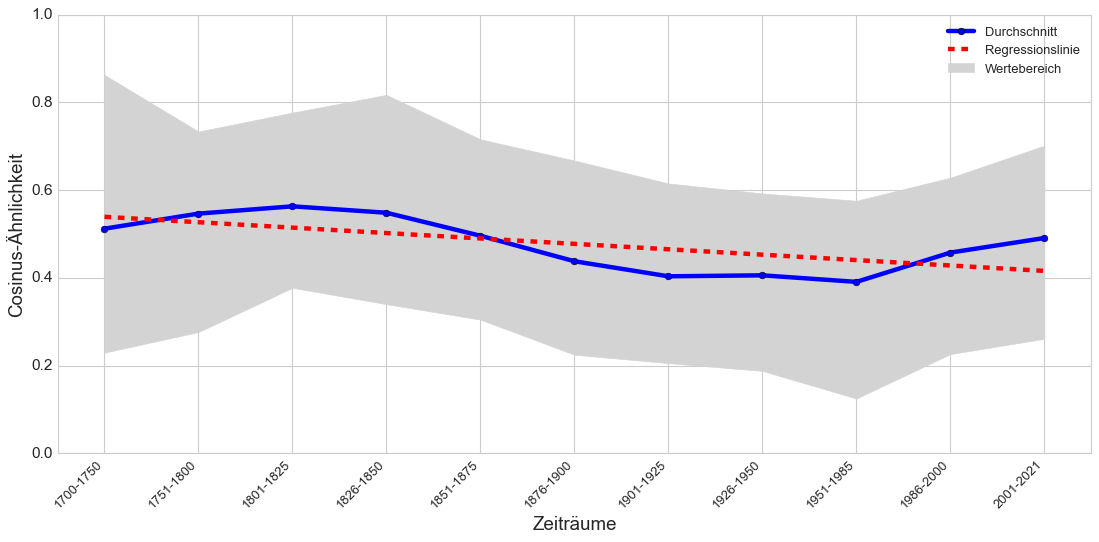

In [27]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [28]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(solecito, 0.9855576157569885)","(assentire, 0.9871923923492432)","(ragunare, 0.9828793406486511)","(profferta, 0.9656975269317627)","(stolto, 0.9395436644554138)","(calunnia, 0.9204142093658447)","(straziare, 0.8790609240531921)","(represso, 0.8827632665634155)","(amfortas, 0.9312211871147156)","(atroce, 0.9078015089035034)","(preda, 0.9366195201873779)"
1,"(coltivargli, 0.9851135015487671)","(andavasi, 0.9869630336761475)","(iared, 0.9818580150604248)","(vincer, 0.9610929489135742)","(schiettezza, 0.9324776530265808)","(persecuzione, 0.9174005389213562)","(onta, 0.8648331761360168)","(sgridare, 0.8808744549751282)","(disperatamente, 0.9171818494796753)","(crudele, 0.8889365792274475)","(crudele, 0.9150722622871399)"
2,"(minorato, 0.9841244220733643)","(alcibiade, 0.9869454503059387)","(tanai, 0.9804191589355469)","(inimicare, 0.9580888748168945)","(straziare, 0.9319894313812256)","(immunità, 0.9060156345367432)","(espiare, 0.8576377034187317)","(patire, 0.8797981142997742)","(gioire, 0.9146763682365417)","(gelosia, 0.886674165725708)","(mutilare, 0.904639720916748)"
3,"(ceduto, 0.983961284160614)","(pezzenti, 0.9866062998771667)","(sbari, 0.9802107810974121)","(abbandonar, 0.9557254314422607)","(viltà, 0.9310078620910645)","(rota, 0.9046480655670166)","(cagion, 0.8571842908859253)","(straziare, 0.874143660068512)","(fiora, 0.9138277173042297)","(follia, 0.88644939661026)","(orribilmente, 0.9012367129325867)"
4,"(latrocinij, 0.9835690259933472)","(dellordinario, 0.9864609241485596)","(ghiaja, 0.9799876809120178)","(spergiuro, 0.9553906321525574)","(tradito, 0.9307827353477478)","(fratellanza, 0.9039103984832764)","(rassegnazione, 0.8561673164367676)","(gioire, 0.8706718683242798)","(scemare, 0.9126629829406738)","(odiare, 0.8856202363967896)","(seminare, 0.8998870849609375)"
5,"(aquilae, 0.9833328127861023)","(disputanti, 0.9857415556907654)","(trojana, 0.9796656966209412)","(vergognarsi, 0.9550302028656006)","(torturare, 0.9304612874984741)","(abnegazione, 0.903156042098999)","(materno, 0.8531423807144165)","(insulto, 0.8704276084899902)","(stomaco, 0.9126216769218445)","(sete, 0.8763431310653687)","(atroce, 0.8952171206474304)"
6,"(ispecchio, 0.9831117391586304)","(facinoroso, 0.9855125546455383)","(dovrò, 0.9796628355979919)","(incrudelire, 0.9542165994644165)","(fervore, 0.9304448366165161)","(divorzio, 0.899236261844635)","(vergogna, 0.8520879745483398)","(avidità, 0.8701662421226501)","(inorridire, 0.912235677242279)","(ossessione, 0.8728544116020203)","(schiena, 0.8882665038108826)"
7,"(addolorati, 0.9830145239830017)","(pravo, 0.9853904247283936)","(istate, 0.9795800447463989)","(vivea, 0.9541634917259216)","(codardo, 0.9263710975646973)","(giurisdizionale, 0.8982905745506287)","(povertà, 0.850557804107666)","(mentire, 0.8681860566139221)","(mariola, 0.9091049432754517)","(orrore, 0.8715967535972595)","(sgomento, 0.8880271911621094)"
8,"(convertito, 0.9830054640769958)","(trattabile, 0.9852486252784729)","(rialzandoci, 0.9794946908950806)","(divisamenti, 0.9541400671005249)","(irritato, 0.9258772134780884)","(ubbidienza, 0.8970875144004822)","(martirio, 0.8489453196525574)","(tormentare, 0.8656342625617981)","(terrorizzare, 0.9090592265129089)","(innocente, 0.8706620931625366)","(spavento, 0.8875740170478821)"
9,"(lasciato, 0.9829641580581665)","(imposti, 0.9852336049079895)","(animanti, 0.9792066812515259)","(illecito, 0.9535887241363525)","(doppiamente, 0.9258199334144592)","(concittadino, 0.8957911729812622)","(compianto, 0.8466415405273438)","(poverina, 0.865389347076416)","(alfio, 0.9090537428855896)","(sublime, 0.8695995211601257)","(dolore, 0.8857147097587585)"


In [29]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.4681493639945984,
 '1751-1800': 0.5566916465759277,
 '1801-1825': 0.5050231218338013,
 '1826-1850': 0.49204736948013306,
 '1851-1875': 0.5128369927406311,
 '1876-1900': 0.5213187336921692,
 '1901-1925': 0.4310595393180847,
 '1926-1950': 0.40555015206336975,
 '1951-1985': 0.40311700105667114,
 '1986-2000': 0.43920281529426575,
 '2001-2021': 0.4216482937335968}

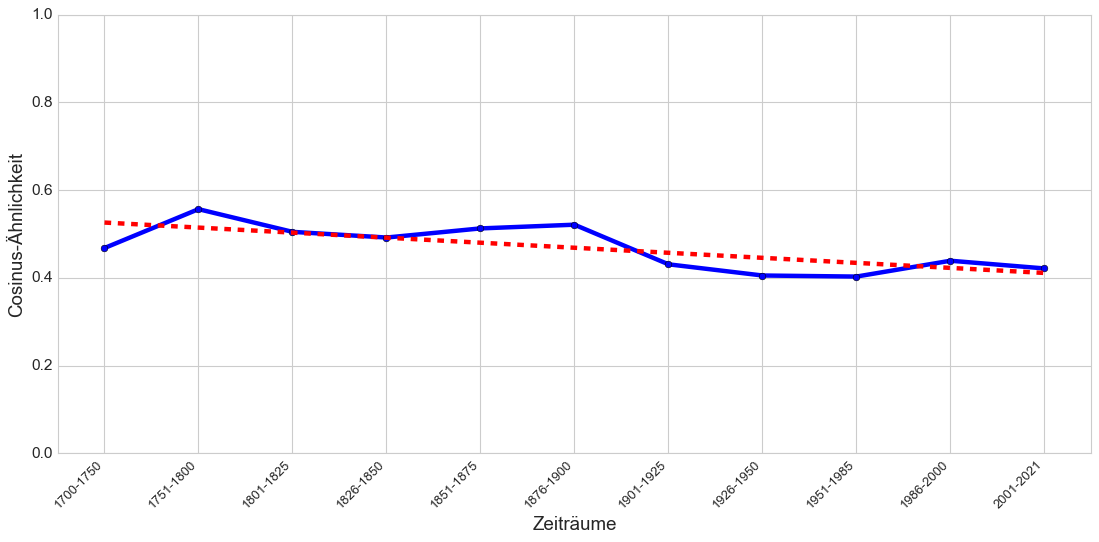

In [30]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

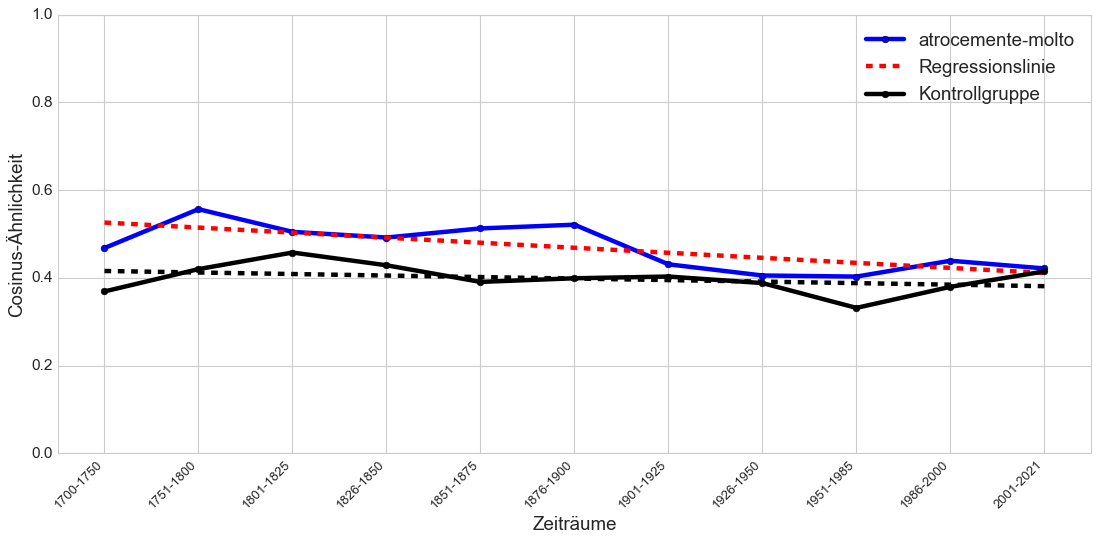

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [32]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [33]:
atrocemente1

{'1700-1750': 0.8411016464233398,
 '1751-1800': 0.7163982391357422,
 '1801-1825': 0.6992372274398804,
 '1826-1850': 0.7629625797271729,
 '1851-1875': 0.757831871509552,
 '1876-1900': 0.644607424736023,
 '1901-1925': 0.6628867387771606,
 '1926-1950': 0.6805772185325623,
 '1951-1985': 0.6658087372779846,
 '1986-2000': 0.7863598465919495,
 '2001-2021': 0.8382376432418823}

In [34]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

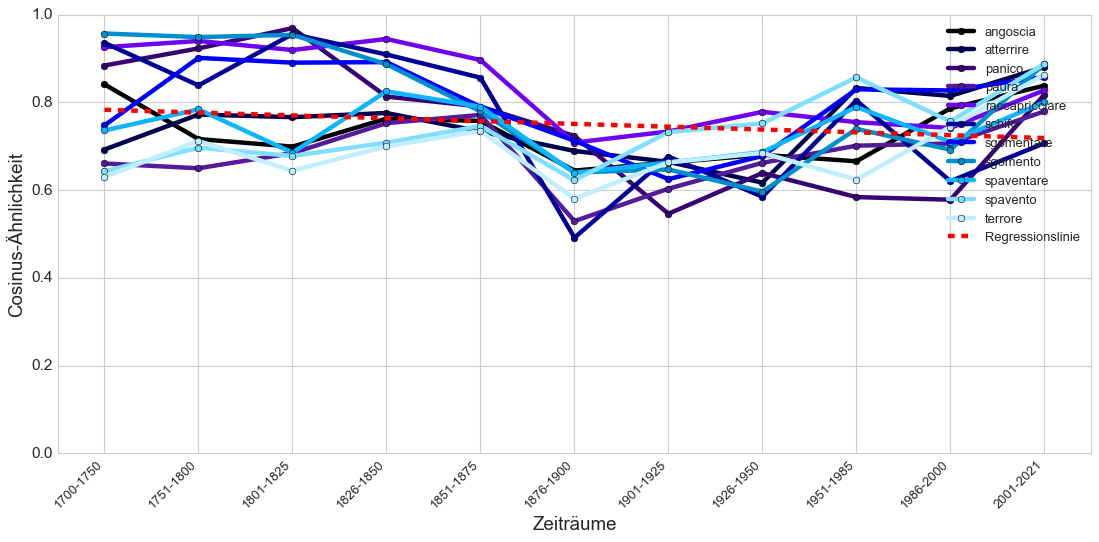

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

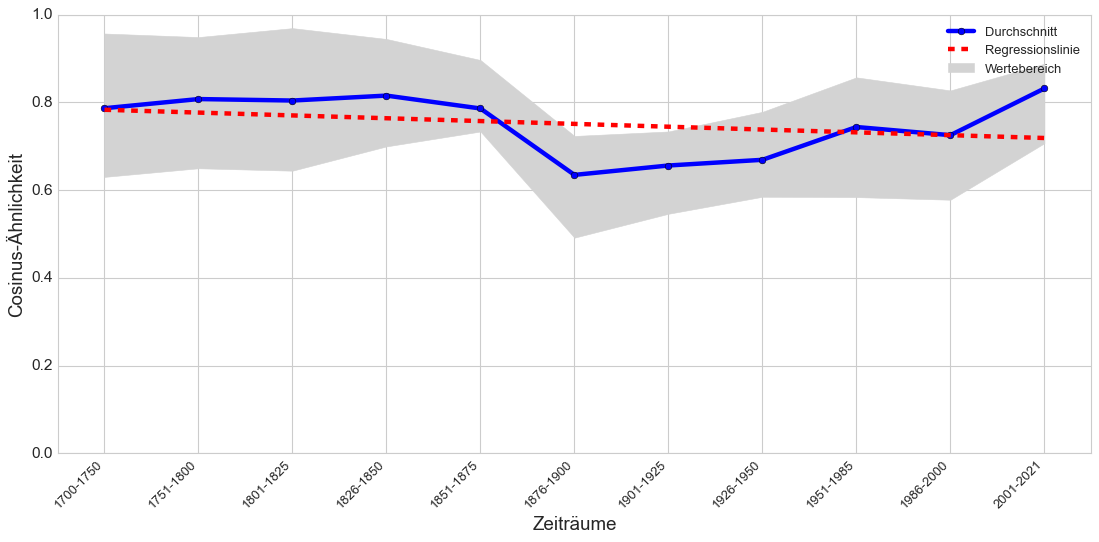

In [36]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

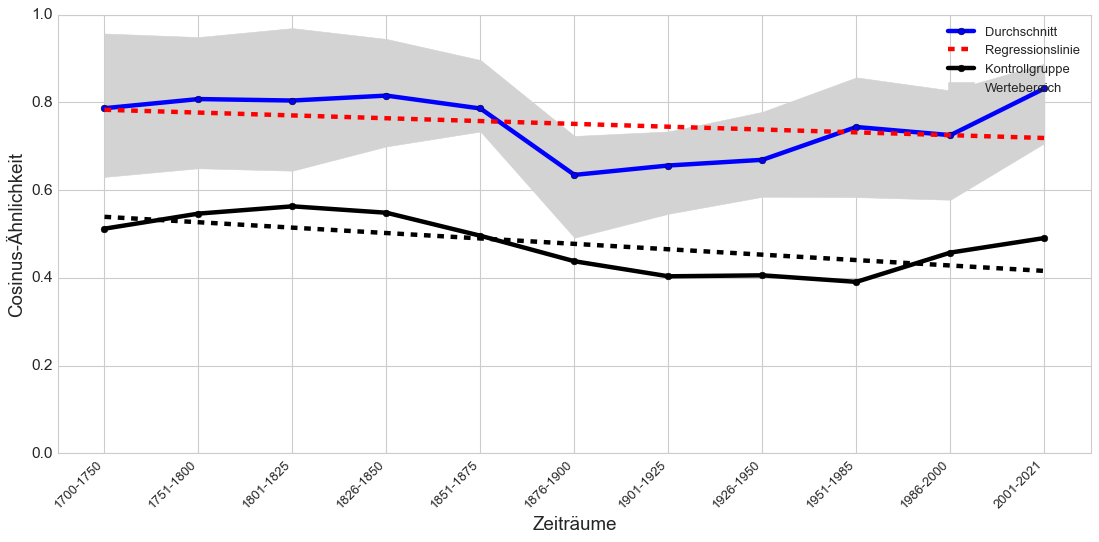

In [37]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [45]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(disusare, 0.9833078980445862)",not in vocab,"(giapeto, 0.9877439737319946)",not in vocab,"(timidezza, 0.9717122912406921)","(sitibonda, 0.9843159317970276)","(lavorio, 0.9269816875457764)","(sciolto, 0.9049529433250427)","(geometria, 0.9562753438949585)","(spaventosamente, 0.9067904353141785)","(tremendamente, 0.9087122082710266)"
1,"(denti, 0.9813289046287537)",not in vocab,"(marra, 0.9870215058326721)",not in vocab,"(permaloso, 0.9697218537330627)","(turbazioni, 0.9832988977432251)","(sprigionare, 0.9243552088737488)","(madido, 0.9032334685325623)","(nebuloso, 0.9495477676391602)","(pianta, 0.8774396777153015)","(terribilmente, 0.8912981152534485)"
2,"(conquisto, 0.9812577962875366)",not in vocab,"(cypra, 0.9870070219039917)",not in vocab,"(bisbetico, 0.969681978225708)","(immaginativa, 0.9817205667495728)","(significazione, 0.923284649848938)","(stravolto, 0.9032066464424133)","(espediente, 0.9489511251449585)","(leggenda, 0.8749422430992126)","(assai, 0.8787011504173279)"
3,"(primitivo, 0.9810634851455688)",not in vocab,"(horatius, 0.9868361949920654)",not in vocab,"(esaltamento, 0.969168484210968)","(crudezza, 0.9811937212944031)","(sensualità, 0.9226258397102356)","(cadaverico, 0.9002873301506042)","(idealità, 0.946218729019165)","(infinitamente, 0.8737424612045288)","(crudo, 0.878387987613678)"
4,"(connesso, 0.980929434299469)",not in vocab,"(auspicato, 0.9865010976791382)",not in vocab,"(essendovi, 0.9689865112304688)","(rigidità, 0.980813205242157)","(istantaneo, 0.9221336245536804)","(pallidissimo, 0.8994231820106506)","(labile, 0.9451375007629395)","(infantile, 0.8718713521957397)","(raffinato, 0.8780413866043091)"
5,"(studenti, 0.9805500507354736)",not in vocab,"(bionda, 0.9864955544471741)",not in vocab,"(ripugnanze, 0.9689174890518188)","(trafitture, 0.9800977110862732)","(sensibilità, 0.9203209280967712)","(pieghevole, 0.8962913155555725)","(informe, 0.9449591636657715)","(pigro, 0.8714229464530945)","(metafora, 0.8751685619354248)"
6,"(rammenter, 0.9804428815841675)",not in vocab,"(porporino, 0.9863921999931335)",not in vocab,"(tantalo, 0.9683222770690918)","(ideologia, 0.9797253012657166)","(mutevole, 0.9199528098106384)","(sanguinante, 0.8961260318756104)","(stilizzazione, 0.9449272751808167)","(insopportabile, 0.8699986338615417)","(sfumatura, 0.8731127977371216)"
7,"(cadens, 0.9803647398948669)",not in vocab,"(falco, 0.9862759709358215)",not in vocab,"(incurabile, 0.9682420492172241)","(intuitivo, 0.979566752910614)","(tensione, 0.9191070199012756)","(ruga, 0.8960871696472168)","(edonistico, 0.9447158575057983)","(farsa, 0.8665948510169983)","(pelle, 0.8724840879440308)"
8,"(incoerenza, 0.980294406414032)",not in vocab,"(scheggiato, 0.9862731695175171)",not in vocab,"(penetrazione, 0.9681366682052612)","(inesplorato, 0.9793081283569336)","(affinare, 0.9184929728507996)","(gracile, 0.8959857225418091)","(distintamente, 0.9446254968643188)","(noioso, 0.864305317401886)","(puro, 0.8719842433929443)"
9,"(trasfigurare, 0.9802314639091492)",not in vocab,"(direm, 0.9860948324203491)",not in vocab,"(presago, 0.9677828550338745)","(ebrietà, 0.9790111184120178)","(penetrante, 0.9157239198684692)","(visetto, 0.8958617448806763)","(bachiana, 0.9438350200653076)","(luminoso, 0.8641325235366821)","(trama, 0.8712890148162842)"


In [46]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.4563383162021637,
 '1801-1825': 0.43164658546447754,
 '1851-1875': 0.5407121777534485,
 '1876-1900': 0.48048463463783264,
 '1901-1925': 0.5023174285888672,
 '1926-1950': 0.510597288608551,
 '1951-1985': 0.5733730792999268,
 '1986-2000': 0.5758327841758728,
 '2001-2021': 0.6050946712493896}

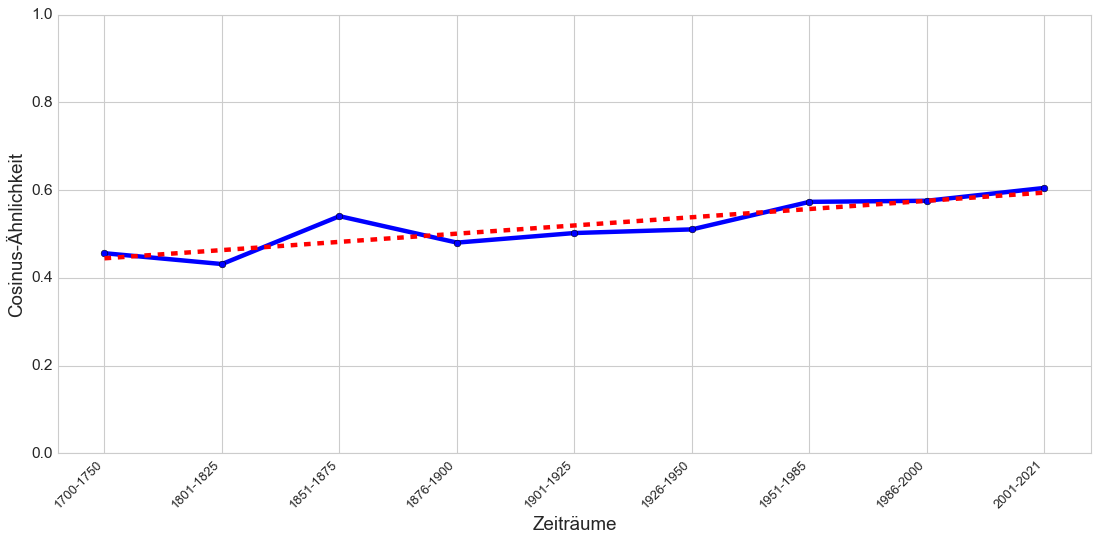

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [48]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [49]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

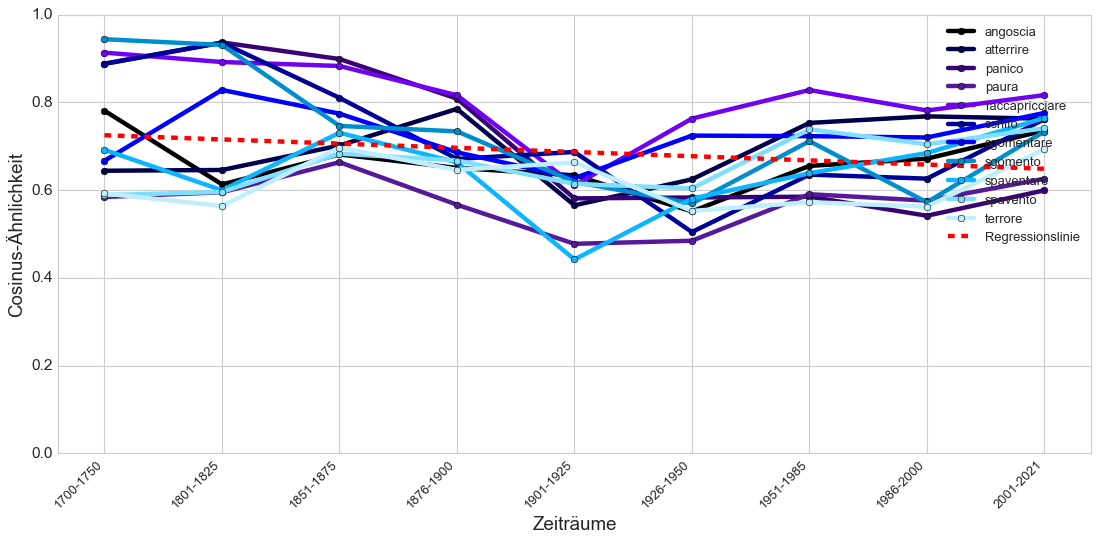

In [50]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

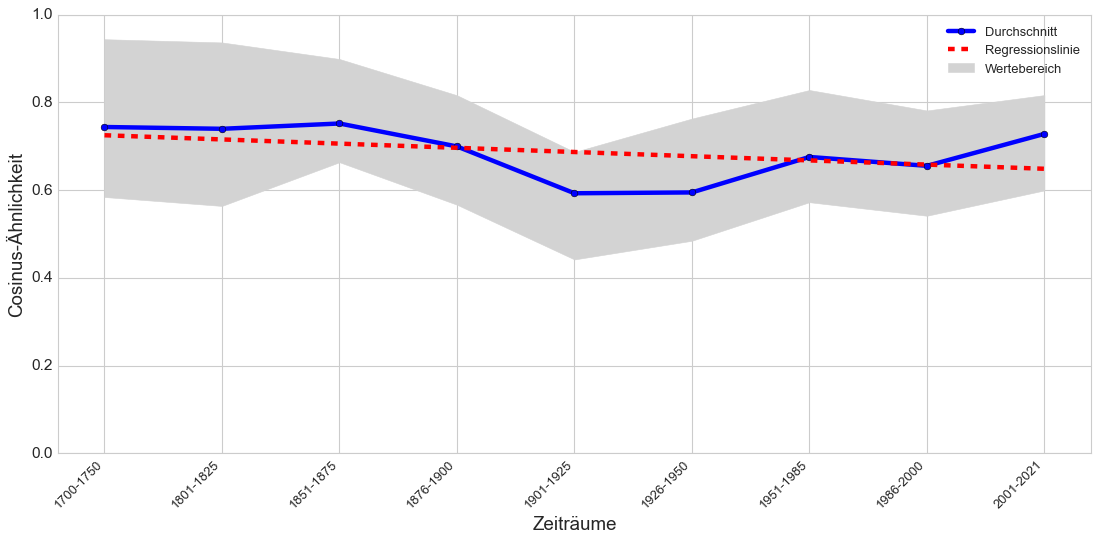

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [52]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(straccio, 0.981845498085022)","(spezz, 0.9845662117004395)","(diafano, 0.9772742390632629)","(ghiacciato, 0.9225541949272156)","(cranio, 0.937761127948761)","(appesantire, 0.92670077085495)","(straziato, 0.9556187391281128)","(mutilare, 0.9480177760124207)","(orribilmente, 0.9340807199478149)"
1,not in vocab,not in vocab,"(scorrenti, 0.9742545485496521)","(stringea, 0.9824629426002502)","(bianchezza, 0.973829984664917)","(arsura, 0.9218644499778748)","(brancicare, 0.9293361902236938)","(arruffare, 0.9232819676399231)","(quindicenne, 0.9532887935638428)","(sfigurato, 0.8934653401374817)","(mutilare, 0.9221391081809998)"
2,not in vocab,not in vocab,"(discoperse, 0.9728562831878662)","(forsennate, 0.982316255569458)","(soffuso, 0.9737402200698853)","(accigliato, 0.9213327169418335)","(fulminato, 0.9290074110031128)","(mansueto, 0.923141598701477)","(bisticciare, 0.9500361084938049)","(proiettile, 0.8924425840377808)","(atrocemente, 0.8852900266647339)"
3,not in vocab,not in vocab,"(balcone, 0.972698986530304)","(festante, 0.9818843007087708)","(fosforescente, 0.9725250601768494)","(umidità, 0.9166792631149292)","(grondare, 0.9284735321998596)","(cinereo, 0.9188131093978882)","(panciana, 0.9478041529655457)","(orribilmente, 0.8877342939376831)","(giacere, 0.8777507543563843)"
4,not in vocab,not in vocab,"(caucaso, 0.9725865125656128)","(discolpare, 0.9816836714744568)","(aggrottate, 0.9722471833229065)","(sbiancare, 0.9166069626808167)","(fracassare, 0.9267706871032715)","(esangue, 0.918660581111908)","(affittuario, 0.9462139010429382)","(sfigurare, 0.885025143623352)","(preda, 0.8687707781791687)"
5,not in vocab,not in vocab,"(rivolve, 0.9725465178489685)","(dorgani, 0.9816573262214661)","(dilatate, 0.972076416015625)","(arrossare, 0.9163785576820374)","(grondante, 0.9247609972953796)","(brividi, 0.9180202484130859)","(ismaelita, 0.9460127353668213)","(cadavere, 0.8846654891967773)","(killer, 0.8643454313278198)"
6,not in vocab,not in vocab,"(empiea, 0.9724968671798706)","(atterriamolo, 0.9815686345100403)","(scintillante, 0.9718816876411438)","(estenuata, 0.915061891078949)","(ruggiva, 0.9224085807800293)","(intridere, 0.9178906679153442)","(scrigno, 0.9450154900550842)","(dilaniare, 0.8818352222442627)","(pianto, 0.8540323972702026)"
7,not in vocab,not in vocab,"(languenti, 0.9724293351173401)","(ispaventose, 0.9815593361854553)","(luccicanti, 0.9717121124267578)","(scolorite, 0.9148459434509277)","(arrossare, 0.9219725728034973)","(prolisso, 0.9169347286224365)","(sgattaiolare, 0.9447749257087708)","(calibro, 0.8748091459274292)","(odore, 0.853521466255188)"
8,not in vocab,not in vocab,"(silenzi, 0.9720978140830994)","(svégliati, 0.9814285635948181)","(ombreggiare, 0.9716259837150574)","(appassito, 0.9144749045372009)","(madido, 0.921497642993927)","(radi, 0.9159356951713562)","(brontolano, 0.9446836709976196)","(ferire, 0.8705428838729858)","(avvolgere, 0.8534141182899475)"
9,not in vocab,not in vocab,"(arcoli, 0.9720955491065979)","(golgota, 0.9811559915542603)","(tinto, 0.971332311630249)","(appiccicare, 0.9136632084846497)","(fiotto, 0.920937180519104)","(avvertiva, 0.9152172207832336)","(agonizzare, 0.944344162940979)","(massacrare, 0.8647492527961731)","(crudele, 0.8528103828430176)"


In [53]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1801-1825': 0.49421751499176025,
 '1826-1850': 0.42496708035469055,
 '1851-1875': 0.39012375473976135,
 '1876-1900': 0.4656125009059906,
 '1901-1925': 0.3701556324958801,
 '1926-1950': 0.40103328227996826,
 '1951-1985': 0.3872954249382019,
 '1986-2000': 0.26130080223083496,
 '2001-2021': 0.3745439648628235}

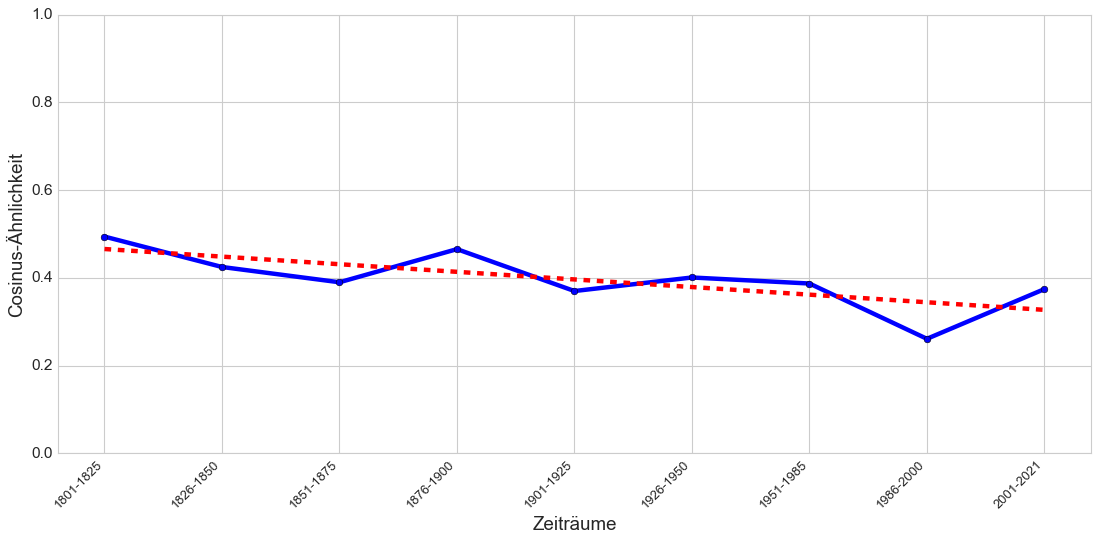

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [55]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [56]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

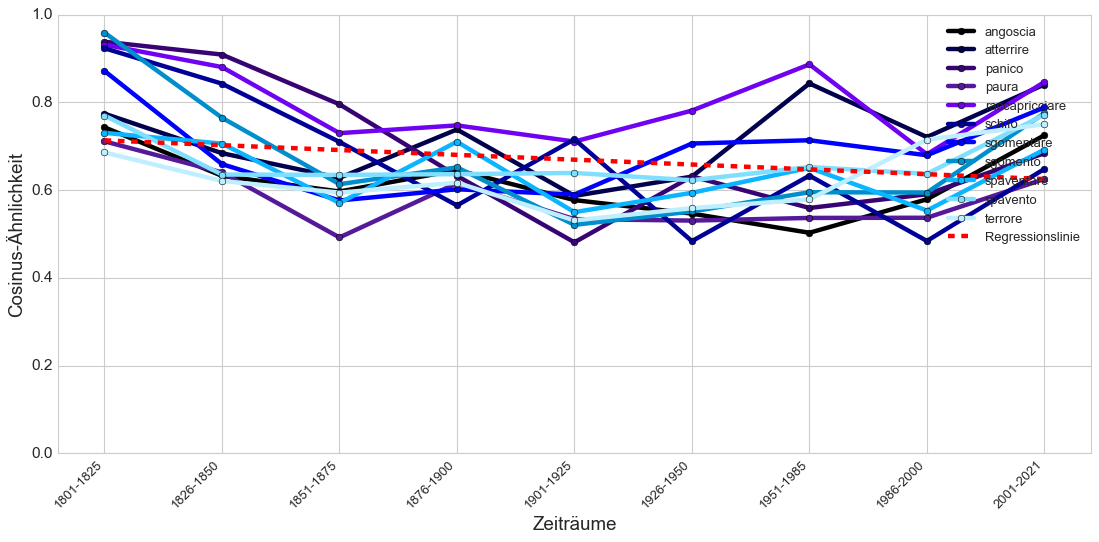

In [57]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

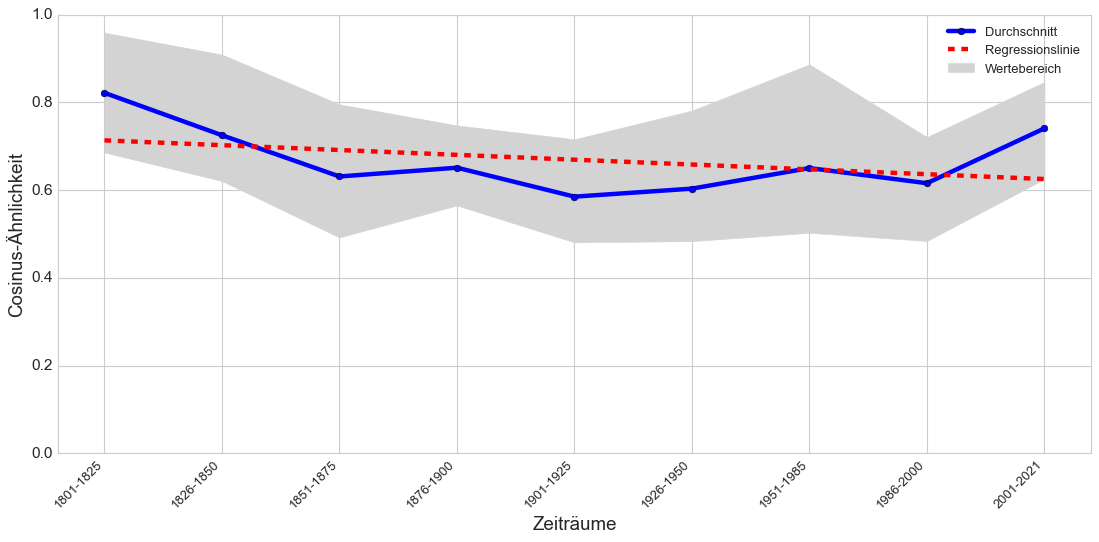

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [59]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(fremea, 0.9361186027526855)","(vessillo, 0.958290159702301)","(orlo, 0.9329577088356018)","(scoglio, 0.9424625635147095)","(livido, 0.917934238910675)","(membra, 0.8117064833641052)","(orrendamente, 0.8186072111129761)","(impassibile, 0.7993004322052002)","(pozza, 0.8900699019432068)","(mutilare, 0.9320422410964966)","(mutilare, 0.9389193058013916)"
1,"(fulminar, 0.9312565326690674)","(semivivo, 0.9580618739128113)","(sudor, 0.9316114187240601)","(leggermente, 0.933233916759491)","(pallore, 0.9135699272155762)","(digrignare, 0.8071115016937256)","(smunto, 0.8068403005599976)","(gatto, 0.7947587966918945)","(grembo, 0.8869497179985046)","(sfigurare, 0.8979561924934387)","(orrendamente, 0.9340807199478149)"
2,"(schiere, 0.930814802646637)","(atra, 0.9539223313331604)","(sospeso, 0.9281418919563293)","(schiena, 0.932465136051178)","(guancie, 0.9072335362434387)","(arteria, 0.805300772190094)","(livido, 0.7947474122047424)","(tenero, 0.7946144342422485)","(cenere, 0.8836537599563599)","(sfigurato, 0.8977242708206177)","(giacere, 0.9021834135055542)"
3,"(aquilonar, 0.9304584860801697)","(turbo, 0.9505271911621094)","(esalare, 0.9278565645217896)","(orlo, 0.9291456341743469)","(palpebra, 0.9019161462783813)","(contorcere, 0.8046450614929199)","(almea, 0.793067455291748)","(sorridente, 0.7925292253494263)","(agonizzare, 0.8810833096504211)","(atroce, 0.8975395560264587)","(atrocemente, 0.9012366533279419)"
4,"(sultan, 0.9301100969314575)","(eburneo, 0.9488379955291748)","(orribil, 0.9277347326278687)","(velocemente, 0.9283972978591919)","(umido, 0.8959223031997681)","(contrazione, 0.802879273891449)","(spaventosamente, 0.7917883992195129)","(creatura, 0.791749894618988)","(pecora, 0.879633367061615)","(pallottola, 0.8943443894386292)","(preda, 0.9010552167892456)"
5,"(corse, 0.929936945438385)","(cinto, 0.9487947821617126)","(inorridire, 0.9276310801506042)","(traversare, 0.927052915096283)","(pupilla, 0.8930881023406982)","(pulsare, 0.7999285459518433)","(testina, 0.7891188859939575)","(sofferente, 0.7812712788581848)","(straziare, 0.878316342830658)","(infernale, 0.8930276036262512)","(cloo, 0.8973161578178406)"
6,"(insanguinata, 0.9294527173042297)","(pregni, 0.9487865567207336)","(lugubre, 0.9267442226409912)","(gruppo, 0.9270160794258118)","(gota, 0.8827211856842041)","(smunto, 0.7975010275840759)","(dilaniare, 0.7888175845146179)","(vile, 0.7807701230049133)","(sudore, 0.8772096633911133)","(orrendamente, 0.8877342939376831)","(killer, 0.8960943818092346)"
7,"(rotare, 0.9259665012359619)","(procelloso, 0.9487553238868713)","(urli, 0.9257106184959412)","(asta, 0.9256957769393921)","(gonfiare, 0.8810038566589355)","(convulsamente, 0.7942466139793396)","(viscere, 0.7852267026901245)","(gracile, 0.7786258459091187)","(assembrare, 0.87669837474823)","(dilaniare, 0.8847576379776001)","(atterrire, 0.8948627710342407)"
8,"(stridi, 0.925540030002594)","(lancia, 0.9468545913696289)","(solco, 0.9240143299102783)","(ripido, 0.9256480932235718)","(asciugare, 0.880600094795227)","(diso, 0.7932220101356506)","(cranio, 0.7834436297416687)","(bambina, 0.7779501080513)","(pigiama, 0.8761630058288574)","(straziare, 0.8840081095695496)","(pianto, 0.8941375613212585)"
9,"(empié, 0.9254745841026306)","(troncato, 0.9467944502830505)","(primiero, 0.9231109023094177)","(ruota, 0.9250235557556152)","(convulso, 0.8801263570785522)","(corrugare, 0.7930828928947449)","(gracile, 0.7817990183830261)","(straziare, 0.7752949595451355)","(succhiare, 0.8755350112915039)","(prostituta, 0.8828268647193909)","(diuz, 0.8929182291030884)"


In [60]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.40615230798721313,
 '1751-1800': 0.4048675000667572,
 '1801-1825': 0.4941672682762146,
 '1826-1850': 0.40660715103149414,
 '1851-1875': 0.3020339906215668,
 '1876-1900': 0.39634472131729126,
 '1901-1925': 0.37589654326438904,
 '1926-1950': 0.44255736470222473,
 '1951-1985': 0.3832882046699524,
 '1986-2000': 0.40878400206565857,
 '2001-2021': 0.3846856653690338}

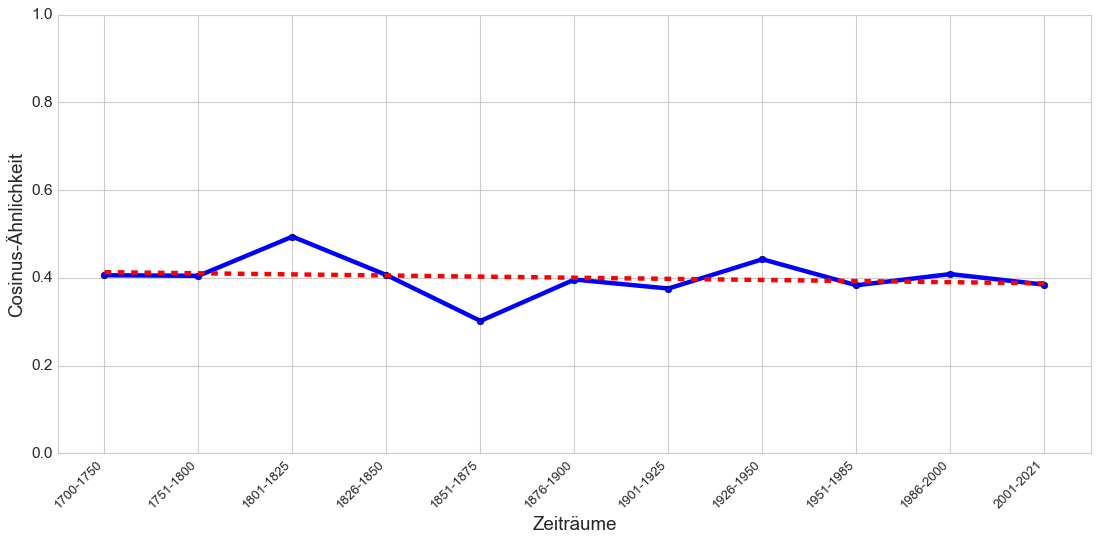

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [62]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [63]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

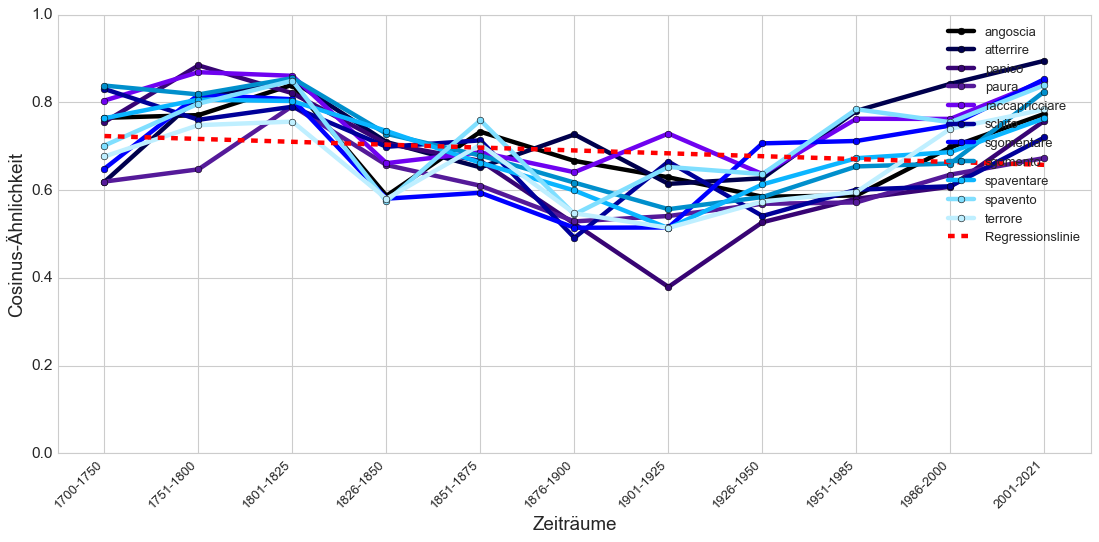

In [64]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

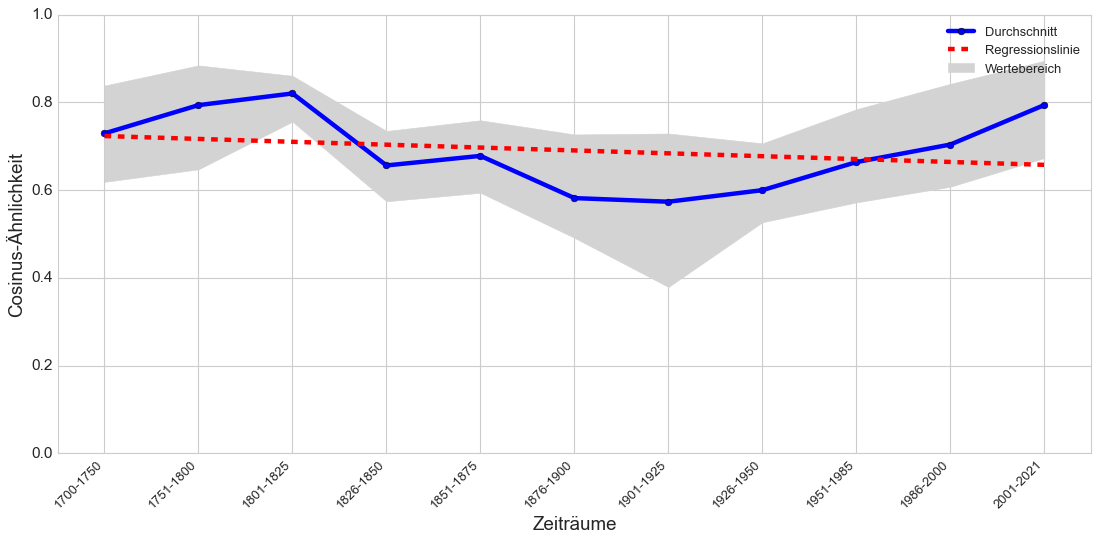

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [66]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(sacrilega, 0.957621693611145)",not in vocab,"(cozzavan, 0.9922970533370972)","(comecch, 0.9896329045295715)","(abbrucia, 0.9793977737426758)","(splende, 0.9506158232688904)","(muscolo, 0.862967312335968)","(carezzare, 0.864738404750824)","(taciturno, 0.8967278599739075)","(mostruosamente, 0.9067904949188232)","(tremendamente, 0.902929961681366)"
1,"(psammetico, 0.9528445601463318)",not in vocab,"(feritrice, 0.9919911026954651)","(sollazzevoli, 0.9894469380378723)","(squittire, 0.976677656173706)","(perennemente, 0.9505324363708496)","(martellare, 0.8490538597106934)","(palpebra, 0.8603308200836182)","(fanciullezza, 0.8943637609481812)","(depressione, 0.8881140947341919)","(assai, 0.8937292098999023)"
2,"(frjus, 0.9525508880615234)",not in vocab,"(asfalto, 0.9913427829742432)","(aristofane, 0.9893505573272705)","(divampare, 0.9766059517860413)","(irrigidire, 0.9496651887893677)","(dilatare, 0.8486425876617432)","(smorto, 0.8593671917915344)","(adolescente, 0.8942870497703552)","(intensità, 0.8873456120491028)","(talmente, 0.8803389668464661)"
3,"(islum, 0.950417160987854)",not in vocab,"(musco, 0.9912975430488586)","(incontinente, 0.9889520406723022)","(digerita, 0.975650429725647)","(voluttuosamente, 0.9477930665016174)","(gonfiare, 0.8409736752510071)","(pupilla, 0.8565152883529663)","(sperduto, 0.8918547034263611)","(insopportabile, 0.8866193890571594)","(lento, 0.8781009912490845)"
4,"(cades, 0.9503639340400696)",not in vocab,"(innosservati, 0.9912015795707703)","(saggiare, 0.9889402389526367)","(pugnalare, 0.9753168225288391)","(giuntura, 0.9472336173057556)","(pulsare, 0.8392626643180847)","(pallore, 0.848983645439148)","(fibra, 0.8894996643066406)","(vistoso, 0.8697983026504517)","(depressione, 0.8772692084312439)"
5,"(approd, 0.9496015310287476)",not in vocab,"(tegoli, 0.9911134839057922)","(contaminarla, 0.988914966583252)","(sospettar, 0.9745324850082397)","(caldura, 0.9460544586181641)","(polmone, 0.8384242057800293)","(contorcere, 0.8486725091934204)","(patire, 0.887610137462616)","(leggero, 0.8662047982215881)","(terribilmente, 0.874471127986908)"
6,"(accostatosi, 0.949057400226593)",not in vocab,"(rostrate, 0.9909290075302124)","(preterire, 0.9887474775314331)","(accentuato, 0.9743895530700684)","(invaso, 0.9459574818611145)","(tempia, 0.8336372971534729)","(gonna, 0.8483272790908813)","(peccatore, 0.879021942615509)","(sprofondare, 0.8654565811157227)","(estremamente, 0.87429279088974)"
7,"(piave, 0.9482817053794861)",not in vocab,"(saporoso, 0.9908742904663086)","(digestione, 0.98874431848526)","(attizzare, 0.9740533828735352)","(accecandolo, 0.9455845952033997)","(ruggiva, 0.8307808041572571)","(occhietto, 0.8468018174171448)","(ciclismo, 0.8748615980148315)","(lento, 0.8652815222740173)","(taglia, 0.8738143444061279)"
8,"(antibo, 0.9482753872871399)",not in vocab,"(bicchieri, 0.9906265735626221)","(pietosamente, 0.9887003302574158)","(restandone, 0.9739153385162354)","(incandescente, 0.9454653859138489)","(pàlpebre, 0.8285521864891052)","(tremito, 0.8458868265151978)","(fattezza, 0.8742923736572266)","(profondità, 0.8623765707015991)","(comprensibile, 0.873047411441803)"
9,"(plenilunio, 0.9482598900794983)",not in vocab,"(apprestan, 0.9905849695205688)","(duolsi, 0.9886873364448547)","(stimavo, 0.9734702706336975)","(addensare, 0.9453138113021851)","(viscere, 0.828018844127655)","(scarno, 0.8448729515075684)","(indifeso, 0.8731269836425781)","(magro, 0.8605836629867554)","(puro, 0.8726078867912292)"


In [67]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.4400275945663452,
 '1801-1825': 0.43689092993736267,
 '1826-1850': 0.5320663452148438,
 '1851-1875': 0.4727301299571991,
 '1876-1900': 0.41551700234413147,
 '1901-1925': 0.3627169728279114,
 '1926-1950': 0.3959589898586273,
 '1951-1985': 0.5585855841636658,
 '1986-2000': 0.6166248917579651,
 '2001-2021': 0.6333867311477661}

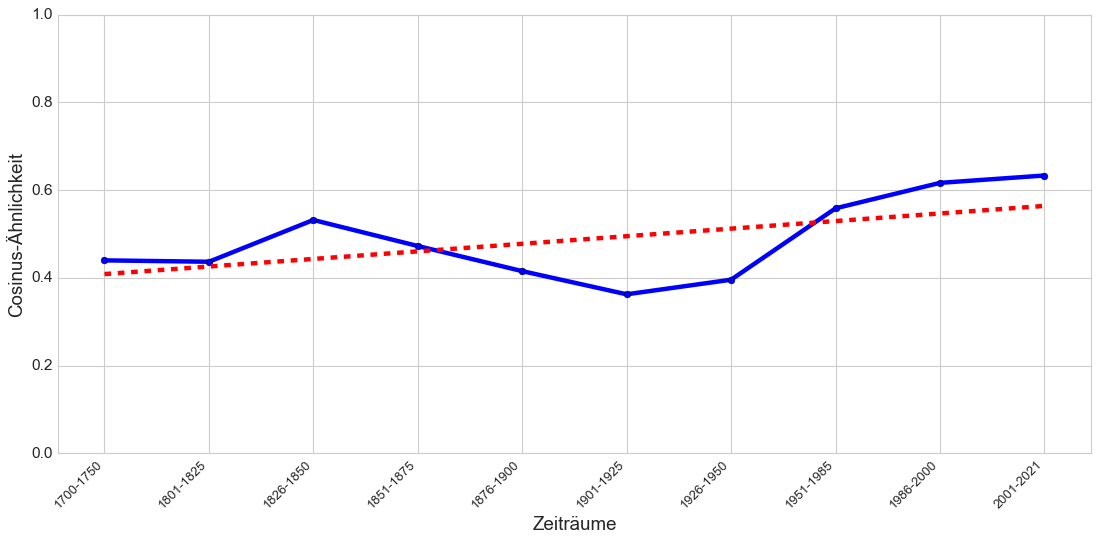

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [69]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [70]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

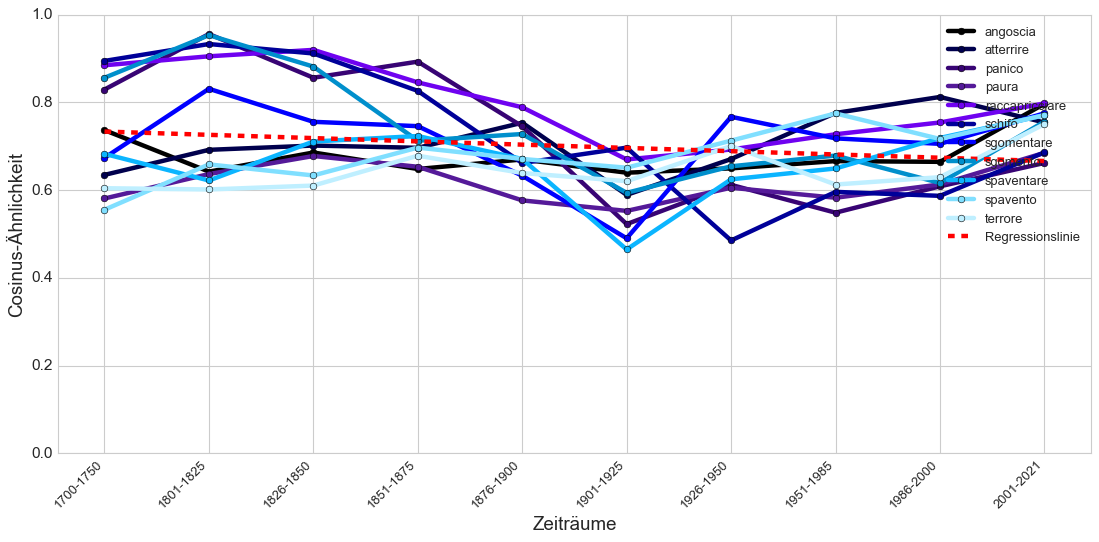

In [71]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

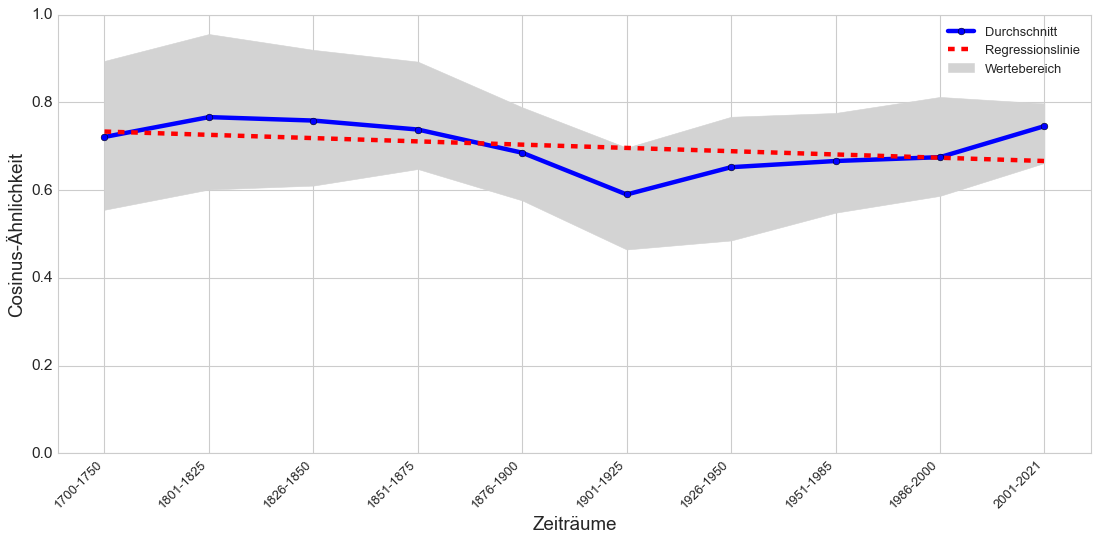

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [73]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,"(ostiglia, 0.9637544751167297)","(brevi, 0.9457119703292847)","(irrevocabile, 0.9680572152137756)","(bastone, 0.9383323788642883)","(brusco, 0.8987269401550293)","(tremendamente, 0.8863110542297363)","(eppur, 0.8046808242797852)","(gelosia, 0.8000697493553162)","(neppur, 0.8772234320640564)","(tremendamente, 0.938389003276825)","(tremendamente, 0.9330355525016785)"
1,"(terni, 0.9636854529380798)","(telefo, 0.9438461661338806)","(impenetrabile, 0.9674227237701416)","(furibondo, 0.9368074536323547)","(affannoso, 0.893608033657074)","(contrazione, 0.8797411918640137)","(stranamente, 0.8021076917648315)","(crudele, 0.7842174768447876)","(alquanto, 0.8678853511810303)","(talmente, 0.8933815956115723)","(angosciante, 0.9318767786026001)"
2,"(lautrech, 0.9626745581626892)","(altoum, 0.9435456395149231)","(comportarlo, 0.963803231716156)","(percossa, 0.9317659735679626)","(turbato, 0.8922901153564453)","(febbricitante, 0.8774896860122681)","(sofferente, 0.8012171983718872)","(pietoso, 0.7693940997123718)","(talmente, 0.8604748249053955)","(insopportabile, 0.8794189691543579)","(confondere, 0.9233134388923645)"
3,"(serravalle, 0.9626629948616028)","(divorzio, 0.943239688873291)","(ricomporre, 0.9616573452949524)","(stocco, 0.9315595626831055)","(dolorosamente, 0.8916960954666138)","(sardonico, 0.8762293457984924)","(fiero, 0.7991114854812622)","(tremendamente, 0.764836311340332)","(stupido, 0.8567177653312683)","(noioso, 0.8790553212165833)","(ironia, 0.9182827472686768)"
4,"(castellana, 0.9621988534927368)","(fissa, 0.9426442384719849)","(colorire, 0.9605861306190491)","(lordo, 0.9310393929481506)","(confuso, 0.8891297578811646)","(sconvolto, 0.8755971789360046)","(plebeo, 0.7959221005439758)","(ingenuo, 0.7638559937477112)","(vergognare, 0.8563600182533264)","(confuso, 0.8759979009628296)","(lucido, 0.9158855080604553)"
5,"(panro, 0.9616003632545471)","(vedi, 0.9410704374313354)","(preordinare, 0.9590451121330261)","(rattenere, 0.9299458265304565)","(spaventevole, 0.8891171813011169)","(orrendamente, 0.8750380277633667)","(dignitoso, 0.7858797907829285)","(avidità, 0.7630816698074341)","(tangere, 0.8519937992095947)","(stanchezza, 0.8741744160652161)","(doloroso, 0.9154741764068604)"
6,"(scultenna, 0.9615334272384644)","(infermare, 0.9400278925895691)","(inasprire, 0.9588790535926819)","(dimenare, 0.9281154274940491)","(sussulto, 0.8878227472305298)","(truce, 0.8730269074440002)","(pensoso, 0.78244549036026)","(sventura, 0.7621829509735107)","(mortificare, 0.8489091992378235)","(angosciante, 0.8731147646903992)","(apparenza, 0.9129601120948792)"
7,"(polesine, 0.9615001678466797)","(dividendoli, 0.9392520189285278)","(indicibile, 0.9584856629371643)","(fregare, 0.9244760870933533)","(profondamente, 0.8873815536499023)","(disfatta, 0.8714846968650818)","(morta, 0.7821734547615051)","(straziare, 0.7617831826210022)","(fisicamente, 0.8438895344734192)","(finzione, 0.8688594102859497)","(assai, 0.9115952849388123)"
8,"(scarseggiar, 0.9612042307853699)","(leggila, 0.9387602210044861)","(malefico, 0.9577199220657349)","(indomabile, 0.9238097071647644)","(impallidire, 0.8871505260467529)","(interrogativo, 0.8698745369911194)","(giocondo, 0.778980016708374)","(indulgente, 0.7607837319374084)","(truculento, 0.8432998657226562)","(talvolta, 0.8687907457351685)","(incutere, 0.9100555777549744)"
9,"(dilantandosi, 0.9603171348571777)","(astringe, 0.9377321600914001)","(vivificare, 0.9572168588638306)","(chiodo, 0.9231014847755432)","(convulsione, 0.886957585811615)","(stranamente, 0.869779109954834)","(alterato, 0.7749407291412354)","(orribilmente, 0.7600574493408203)","(taluno, 0.8425440788269043)","(triste, 0.8668169379234314)","(talvolta, 0.9082791805267334)"


In [74]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.3861735761165619,
 '1751-1800': 0.4664202034473419,
 '1801-1825': 0.5909411311149597,
 '1826-1850': 0.42531272768974304,
 '1851-1875': 0.45486024022102356,
 '1876-1900': 0.4369055926799774,
 '1901-1925': 0.4909536838531494,
 '1926-1950': 0.5293071269989014,
 '1951-1985': 0.6084832549095154,
 '1986-2000': 0.6566619873046875,
 '2001-2021': 0.5728396773338318}

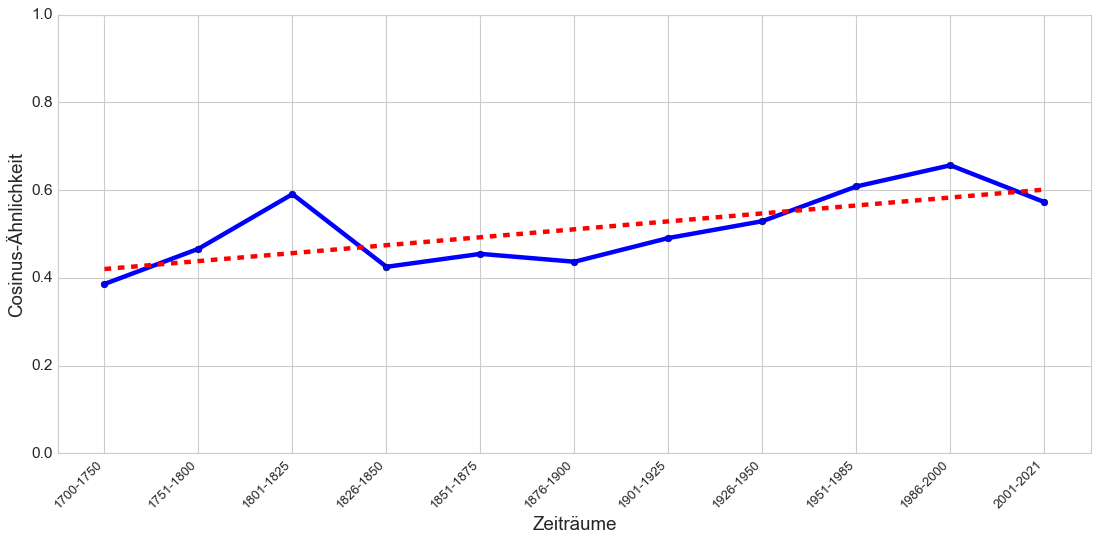

In [75]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')


plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

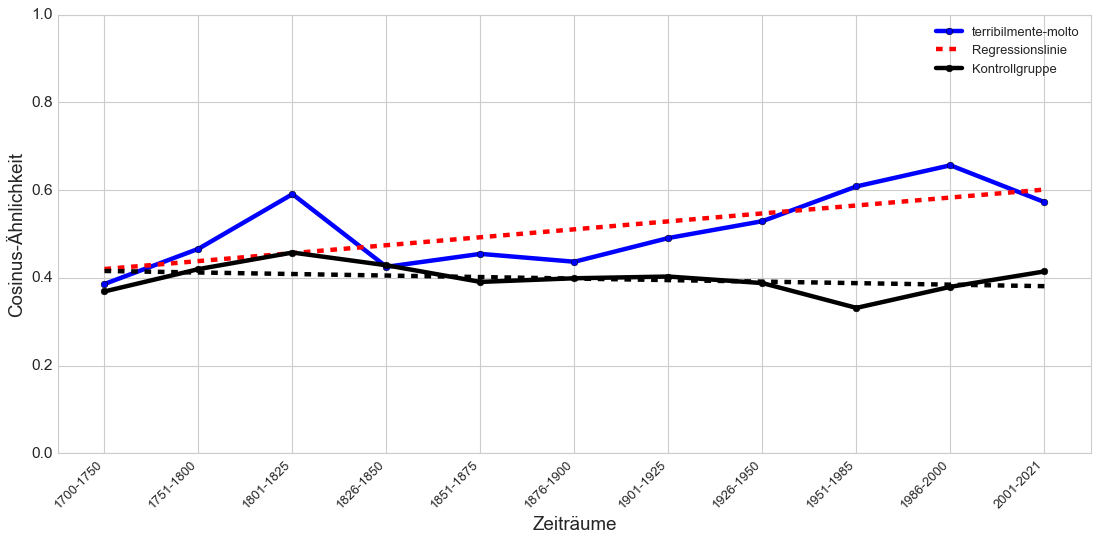

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [77]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [78]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

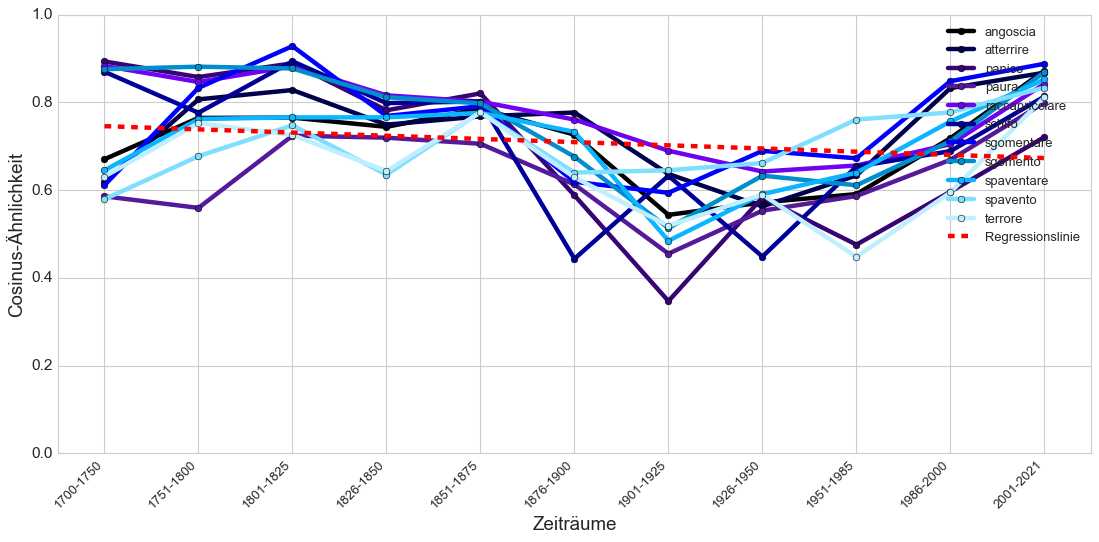

In [79]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

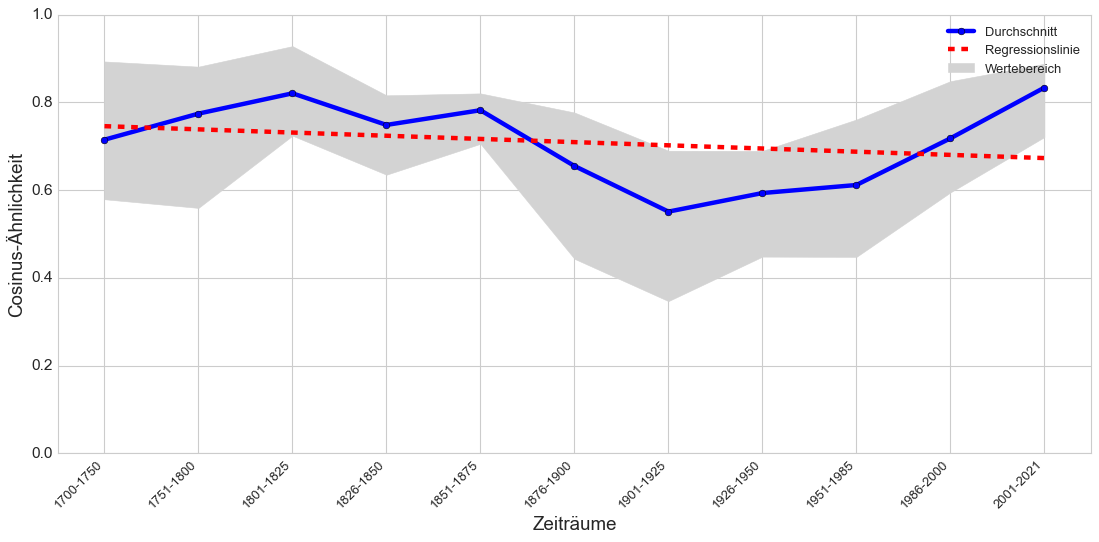

In [80]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [81]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1985,1986-2000,2001-2021
0,not in vocab,not in vocab,"(postiglion, 0.9909979104995728)",not in vocab,"(pulsazione, 0.9606688022613525)","(sconvolto, 0.9209229350090027)","(repulsione, 0.9325985908508301)","(nausea, 0.9297592639923096)","(consapevolmente, 0.9353893399238586)","(terribilmente, 0.9383890628814697)","(terribilmente, 0.9330357909202576)"
1,not in vocab,not in vocab,"(atten, 0.9903196096420288)",not in vocab,"(rantolo, 0.9555081129074097)","(commiserazione, 0.9195106625556946)","(ferocia, 0.9323563575744629)","(incutere, 0.9222179651260376)","(preferibile, 0.9327382445335388)","(noioso, 0.9153662919998169)","(talmente, 0.9311158657073975)"
2,not in vocab,not in vocab,"(scheggiato, 0.9900761842727661)",not in vocab,"(respirazione, 0.9550121426582336)","(implacabile, 0.9176388382911682)","(infondere, 0.9283698797225952)","(rimordere, 0.9122318029403687)","(incognita, 0.9307845234870911)","(angosciante, 0.8954795598983765)","(seppure, 0.9216691851615906)"
3,not in vocab,not in vocab,"(muggisce, 0.9895334839820862)",not in vocab,"(schiantare, 0.9542056322097778)","(comprimere, 0.9066777229309082)","(osceno, 0.9234834909439087)","(poverina, 0.9109990000724792)","(liscia, 0.9307360053062439)","(talmente, 0.8933817744255066)","(angosciante, 0.9191136360168457)"
4,not in vocab,not in vocab,"(lagnella, 0.9895002841949463)",not in vocab,"(pesantezza, 0.9520735144615173)","(contrazione, 0.9064227938652039)","(repugnanza, 0.9232591986656189)","(attanagliare, 0.9095304012298584)","(oltremodo, 0.9300338625907898)","(finzione, 0.8923730850219727)","(assai, 0.9145472049713135)"
5,not in vocab,not in vocab,"(enopide, 0.9894607067108154)",not in vocab,"(letargo, 0.9487675428390503)","(glaciale, 0.9058718085289001)","(sentito, 0.921980082988739)","(avvilire, 0.9084028005599976)","(disquisizione, 0.92988520860672)","(apparenza, 0.8919792175292969)","(confondere, 0.9134407043457031)"
6,not in vocab,not in vocab,"(succiameli, 0.9892252087593079)",not in vocab,"(inenarrabile, 0.9486626386642456)","(effondere, 0.9035006761550903)","(maternità, 0.9199604392051697)","(trepido, 0.9079025387763977)","(erroneo, 0.9298655986785889)","(banale, 0.8891240358352661)","(talvolta, 0.9110426306724548)"
7,not in vocab,not in vocab,"(hungarica, 0.9891289472579956)",not in vocab,"(scapigliato, 0.9482894539833069)","(acuire, 0.9016176462173462)","(melanconia, 0.9188247919082642)","(disgraziata, 0.9078856110572815)","(filogenesi, 0.9298653602600098)","(mediocre, 0.8883815407752991)","(mostruosamente, 0.9087122678756714)"
8,not in vocab,not in vocab,"(fenditura, 0.9890376329421997)",not in vocab,"(puntura, 0.9468443393707275)","(incurabile, 0.8988731503486633)","(oppressione, 0.9180742502212524)","(insulto, 0.9066444039344788)","(giustificabile, 0.929129958152771)","(ingenuo, 0.887888491153717)","(sgradevole, 0.9086562395095825)"
9,not in vocab,not in vocab,"(reddia, 0.9889907240867615)",not in vocab,"(labbri, 0.9453843832015991)","(disdegno, 0.8988193869590759)","(irritante, 0.9180415272712708)","(intollerabile, 0.9063495397567749)","(umanit, 0.9290668368339539)","(esagerato, 0.8857848644256592)","(apparenza, 0.9077785015106201)"


In [82]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.4281126856803894,
 '1851-1875': 0.42389217019081116,
 '1876-1900': 0.42930862307548523,
 '1901-1925': 0.5356495976448059,
 '1926-1950': 0.47893521189689636,
 '1951-1985': 0.5551695823669434,
 '1986-2000': 0.6628472208976746,
 '2001-2021': 0.6594792008399963}

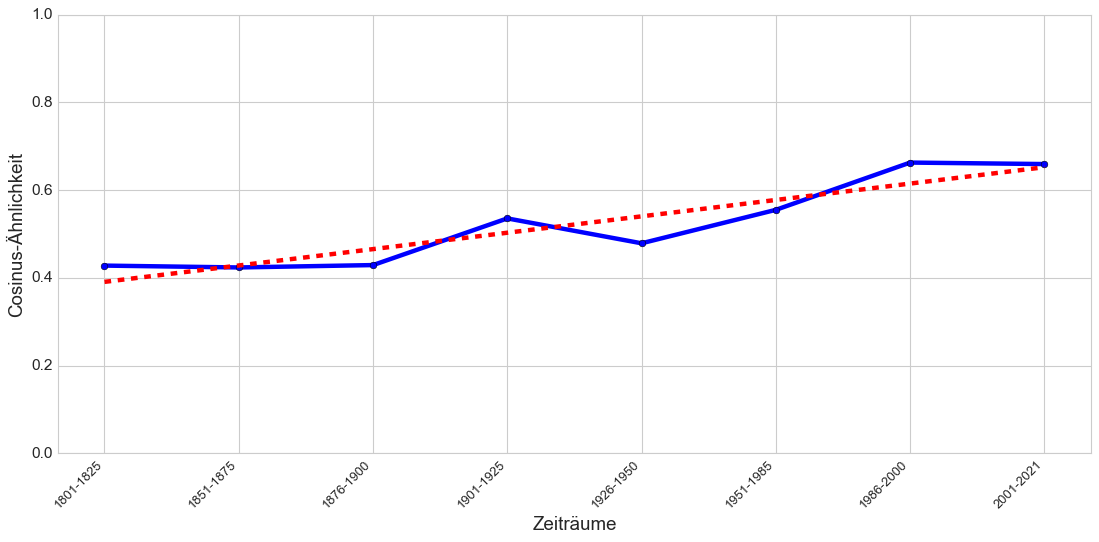

In [83]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [84]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [85]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

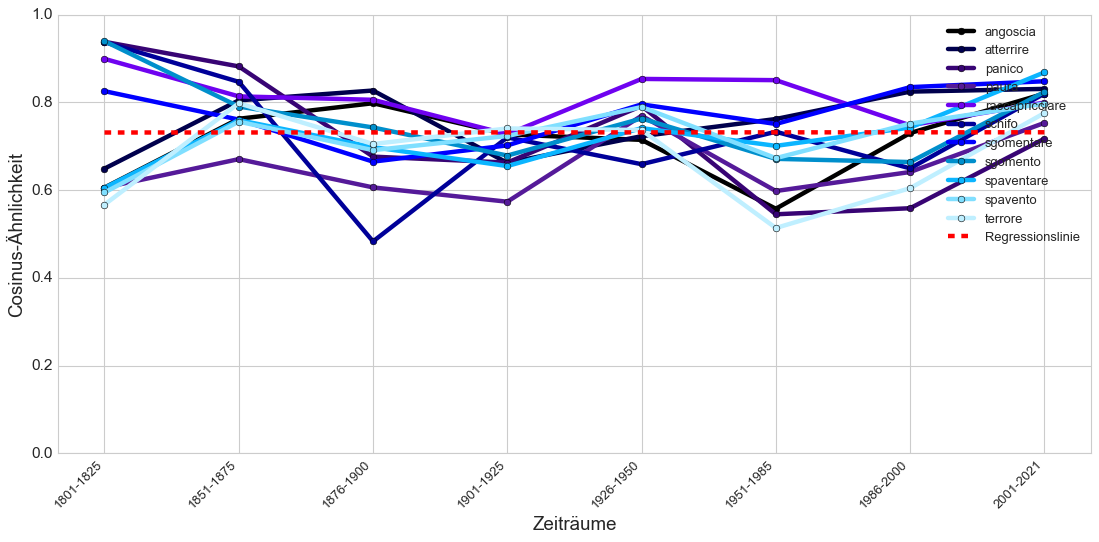

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

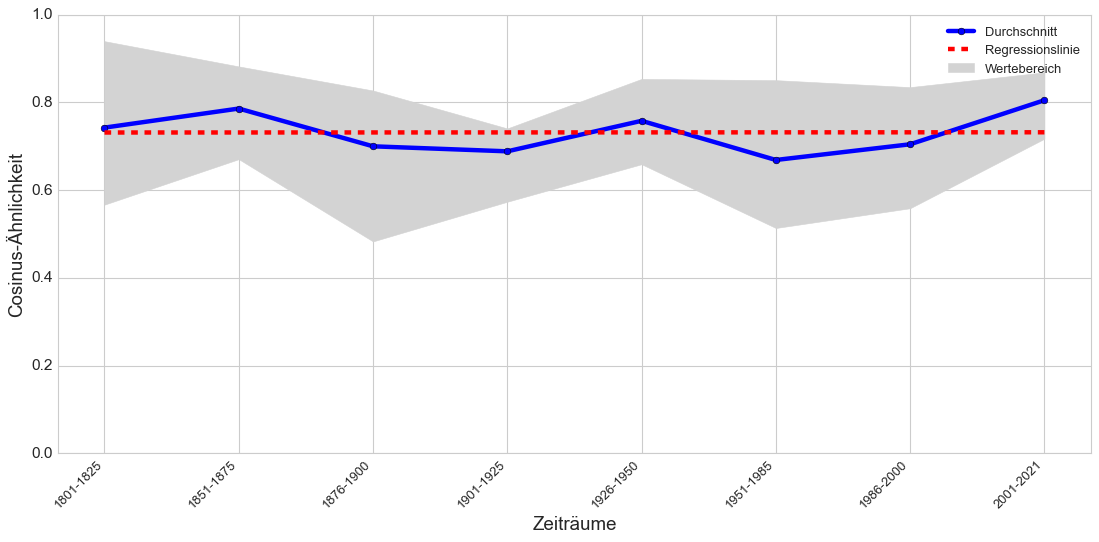

In [87]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()